# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in `pierce_county_house_sales.csv`, car prices in `cars_hw.csv`, and airbnb rental prices in `airbnb_hw.csv`.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an 80/20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Make partial correlation plots for each of the numeric variables in your model. Do you notice any significant non-linearities?
6. Include transformations and interactions of your variables, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
7. Summarize your results from 1 to 6. Have you learned anything about overfitting and underfitting, or model selection?
8. Use the `sklearn.linear_model.Lasso` to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Question 1
##EDA

In [2]:
cars = pd.read_csv('cars_hw.csv')
cars = cars.drop_duplicates()
cars.dropna(inplace=True)
cars.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [3]:
cars['No_of_Owners'] = cars['No_of_Owners'].astype('string')
cars['No_of_Owners'] = cars['No_of_Owners'].str[0]
cars['No_of_Owners'] = cars['No_of_Owners'].astype('int')
cars['No_of_Owners'].unique()

array([1, 2, 3])

In [4]:
cars.describe()

,Unnamed: 0,Make_Year,Mileage_Run,No_of_Owners,Seating_Capacity,Price
count,976.000000,976.000000,976.000000,976.000000,976.000000,9.760000e+02
mean,488.500000,2016.963115,41571.195697,1.165984,5.095287,7.410195e+05
std,281.891232,2.818742,24390.995134,0.383119,0.446224,3.673234e+05
min,1.000000,2011.000000,1117.000000,1.000000,4.000000,1.880000e+05
25%,244.750000,2015.000000,22676.750000,1.000000,5.000000,4.757500e+05
50%,488.500000,2017.000000,37570.500000,1.000000,5.000000,6.665000e+05
75%,732.250000,2019.000000,57421.250000,1.000000,5.000000,8.830000e+05
max,976.000000,2022.000000,99495.000000,3.000000,8.000000,2.941000e+06


##Visualizations

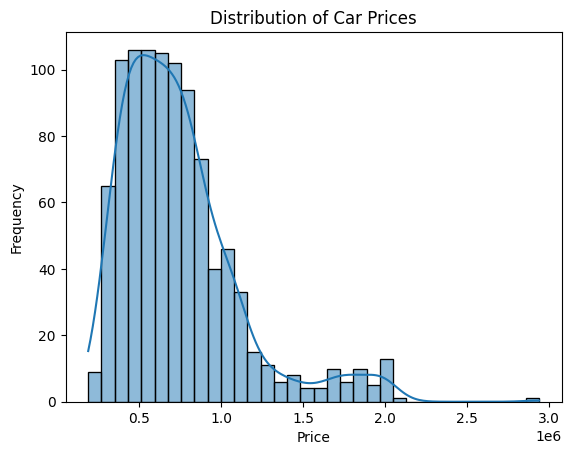

In [5]:
sns.histplot(cars['Price'], kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Shows that there are not many outliers.

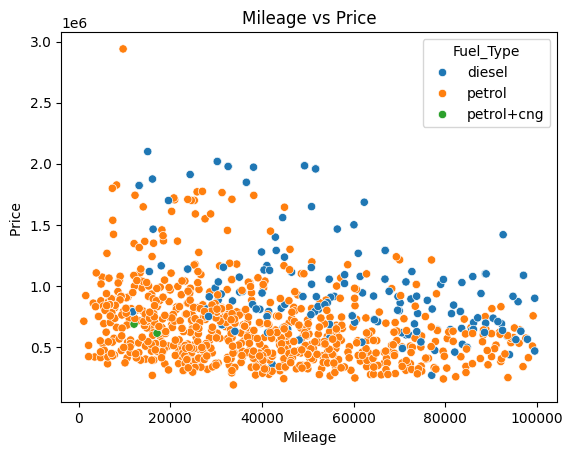

In [6]:
sns.scatterplot(data=cars, x='Mileage_Run', y='Price', hue='Fuel_Type')
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price ')
plt.show()

Mileage has minimal impact on price and diesel tends to be more expensive than petrol.

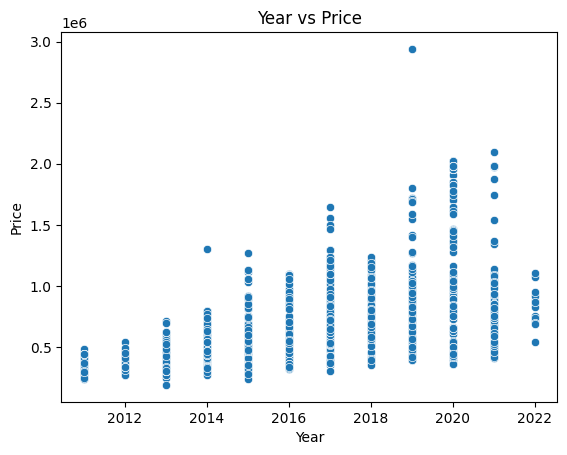

In [7]:
sns.scatterplot(data=cars, x='Make_Year', y='Price')
plt.title('Year vs Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

Newer cars tend to be more expensive.

#Question 2

In [8]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [9]:
X = cars.drop(columns=['Price'])
y = cars['Price']

cat_col = ['Make', 'Color', 'Body_Type', 'Fuel_Type', 'Transmission_Type']
num_col = ['Mileage_Run', 'Make_Year', 'No_of_Owners', 'Seating_Capacity']

In [10]:
pre = ColumnTransformer(transformers=
 [('cat', OneHotEncoder(drop='first'), cat_col),
  ('num', StandardScaler(), num_col)])

In [11]:
X_transformer = pre.fit_transform(X)
print(X_transformer.shape)

(976, 40)
